<div align="center"> 
    <h3><font color='blue'>CSE 574 Sections C&D: Introduction to Machine Learning, Spring 2022 </font></h3>
    <h1> Assignment 3 </h1>
    <h2> Part 4 : Optimizing CNN + Data Augumentation </h2>
    <h4> Submitted By : Akanksha Das & Rahat Bhalla </h4>

<p>"I (We) certify that the code and data in this assignment were generated independently,using only the tools and resources defined in the course and that I (we) did not receive any external help, coaching or contributions during the production of this work."</p>
</div>

In [2]:
#Importing Necessary Libraries for Implementing Part 1
import math
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plotter
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import cross_val_score
from keras.utils.np_utils import to_categorical  
from keras.datasets import fashion_mnist 
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers


<b>Analyzing Attributes of Given Data:<b>

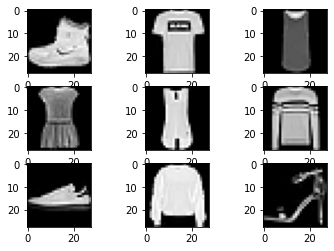

In [3]:
# plot first few images
for i in range(9):
	# define subplot
	plotter.subplot(330 + 1 + i)
	# plot raw pixel data
	plotter.imshow(x_train[i], cmap=plotter.get_cmap('gray'))
# show the figure
plotter.show()

In [4]:
print(f'Shape of X_train {x_train.shape}')
print(f'Shape of Y_train {y_train.shape}')
print(f'Shape of X_test {x_test.shape}')
print(f'Shape of Y_test {y_test.shape}')

Shape of X_train (60000, 28, 28)
Shape of Y_train (60000,)
Shape of X_test (10000, 28, 28)
Shape of Y_test (10000,)


In [5]:
# #Check How many attributes are missing information

# print('\n~~Checking for Samples with Missing Data~~\n')
# print('Total Number of Samples is:',x_train,'\n')
# attributesWithMissingValues=0
# # incomeDataFrame=incomeDataFrame.replace('?',pd.NA)

# for i in range(len(x_train)):
#     dataCount = x_train[i].count()
#     if x_train-dataCount>0:
#         print("No of Samples in data set with missing attribute '{0}' are: {1}".format(x_train[i],x_train-dataCount))
#         attributesWithMissingValues=attributesWithMissingValues+1

# print("\nNo of Columns that have missing values:",attributesWithMissingValues)


In [6]:
print(f'Datatype of X_train {x_train.dtype}')
print(f'Datatype of Y_train {y_train.dtype}')
print(f'Datatype of X_test {x_test.dtype}')
print(f'Datatype of Y_test {y_test.dtype}')

Datatype of X_train uint8
Datatype of Y_train uint8
Datatype of X_test uint8
Datatype of Y_test uint8


Converting to Category:<b>

In [7]:
y_train= to_categorical(y_train)
y_test= to_categorical(y_test)


In [8]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
print(f'Datatype of X_train {x_train.dtype}')
print(f'Datatype of X_test {x_test.dtype}')

Datatype of X_train float32
Datatype of X_test float32


In [9]:
print(f'Datatype of Y_train {y_train.dtype}')
print(f'Datatype of Y_test {y_test.dtype}')

Datatype of Y_train float32
Datatype of Y_test float32


Normalizing x values

In [10]:
x_train = x_train/255.0
x_test = x_test/255.0

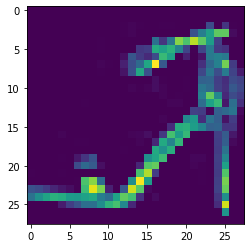

In [11]:
image=x_train[8,:].reshape((28,28))
plotter.imshow(image)
plotter.show()

In [12]:
no_of_pixel_rows=28
no_of_pixel_columns=28
net_shape=(no_of_pixel_rows,no_of_pixel_columns,1)
x_train=x_train.reshape(x_train.shape[0], *net_shape)
x_test=x_test.reshape(x_test.shape[0], *net_shape)

print(f"Shape of Training X after reshaping {x_train.shape}")
print(f"Shape of Test X after reshaping {x_test.shape}")

Shape of Training X after reshaping (60000, 28, 28, 1)
Shape of Test X after reshaping (10000, 28, 28, 1)


In [13]:
y_train.shape

(60000, 10)

<b>Implementing NN Model<b>

In [14]:

ConvolutionalNeuralNetworkModel = keras.Sequential([
                                  Conv2D(filters=32, kernel_size =2, padding='same',activation = 'relu', input_shape=net_shape),
                                  MaxPooling2D(pool_size=2),
                                  Dropout(0.25),
                                  Conv2D(filters=64, kernel_size =2, padding='same', activation = 'relu'),
                                  MaxPooling2D(pool_size=2),
                                  Dropout(0.25),
                                  Flatten(),
                                  Dense(80, activation='relu'),
                                  
                                  Dense(10,activation='softmax')])
   

ConvolutionalNeuralNetworkModel.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                          metrics=['accuracy'])
trainingResults = ConvolutionalNeuralNetworkModel.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=50)


Epoch 1/50
469/469 [==============================] - 20s 18ms/step - loss: 0.5709 - accuracy: 0.7935 - val_loss: 0.4130 - val_accuracy: 0.8553
Epoch 2/50
469/469 [==============================] - 8s 17ms/step - loss: 0.3859 - accuracy: 0.8624 - val_loss: 0.3527 - val_accuracy: 0.8753
Epoch 3/50
469/469 [==============================] - 5s 12ms/step - loss: 0.3464 - accuracy: 0.8766 - val_loss: 0.3247 - val_accuracy: 0.8827
Epoch 4/50
469/469 [==============================] - 7s 15ms/step - loss: 0.3169 - accuracy: 0.8860 - val_loss: 0.3066 - val_accuracy: 0.8895
Epoch 5/50
469/469 [==============================] - 7s 14ms/step - loss: 0.2951 - accuracy: 0.8937 - val_loss: 0.2939 - val_accuracy: 0.8927
Epoch 6/50
469/469 [==============================] - 6s 13ms/step - loss: 0.2774 - accuracy: 0.8983 - val_loss: 0.2727 - val_accuracy: 0.9027
Epoch 7/50
469/469 [==============================] - 7s 14ms/step - loss: 0.2651 - accuracy: 0.9024 - val_loss: 0.2687 - val_accuracy: 0.903

In [15]:
trainingAccuracy = ConvolutionalNeuralNetworkModel.evaluate(x_train,y_train,verbose=0)
testingAccuracy = ConvolutionalNeuralNetworkModel.evaluate(x_test,y_test,verbose=0)
print('\n\n')
print('\nTraining Accuracy: ',trainingAccuracy[1])
print('\nTest Accuracy: ',testingAccuracy[1])





Training Accuracy:  0.9854833483695984

Test Accuracy:  0.9218999743461609


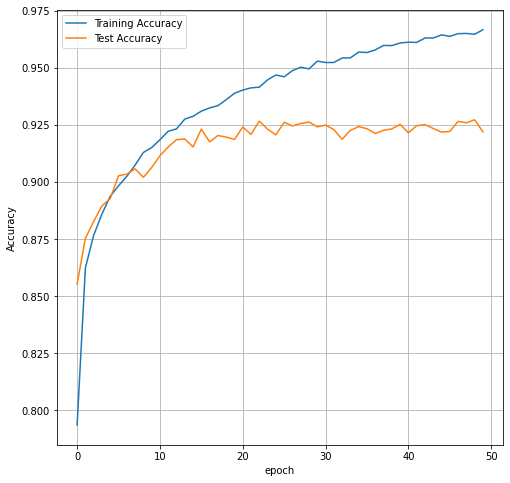

In [16]:
plotter.figure(figsize=(8,8))
plotter.plot(trainingResults.history['accuracy'], label='Training Accuracy')
plotter.plot(trainingResults.history['val_accuracy'], label='Test Accuracy')
plotter.xlabel('epoch')
plotter.ylabel('Accuracy')
plotter.legend()
plotter.grid()
plotter.show()

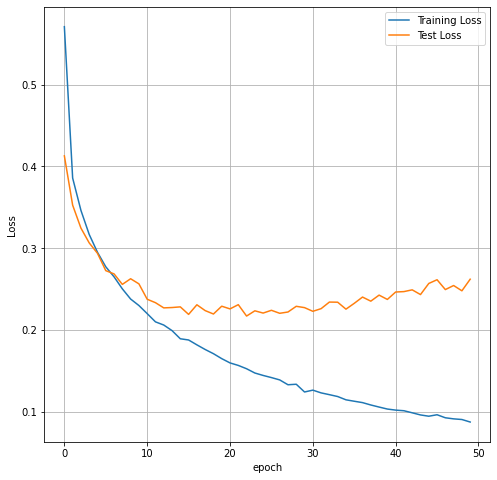

In [17]:
plotter.figure(figsize=(8,8))
plotter.plot(trainingResults.history['loss'], label='Training Loss')
plotter.plot(trainingResults.history['val_loss'], label='Test Loss')
plotter.xlabel('epoch')
plotter.ylabel('Loss')
plotter.legend()
plotter.grid()
plotter.show()

In [18]:
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
])
data_augmentation2 = keras.Sequential([
  layers.RandomFlip("vertical"),
])
data_augmentation3 = keras.Sequential([
  layers.RandomContrast(factor=0.2)
])
data_augmentation4 = keras.Sequential([
   layers.RandomZoom(0.01)                                    
])
ConvolutionalNeuralNetworkModel = keras.Sequential([
                                  data_augmentation,
                                  data_augmentation2,
                                  data_augmentation3,
                                  data_augmentation4,
                                  Conv2D(filters=32, kernel_size =2, padding='same', activation = 'relu', input_shape=net_shape),
                                  MaxPooling2D(pool_size=2),
                                  Dropout(0.25),
                                  Conv2D(filters=64, kernel_size =2, padding='same', activation = 'relu'),
                                  MaxPooling2D(pool_size=2),
                                  Dropout(0.25),
                                  Flatten(),
                                  Dense(80, activation='relu'),
                                  
                                  Dense(10,activation='softmax')])
   

ConvolutionalNeuralNetworkModel.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                          metrics=['accuracy'])
trainingResults = ConvolutionalNeuralNetworkModel.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=50)


# H = ConvolutionalNeuralNetworkModel.fit_generator(aug.flow(x_train, y_train, batch_size=128),
# 	validation_data=(x_test, y_test), steps_per_epoch=len(x_train) // 128,
# 	epochs=50)

Epoch 1/50
469/469 [==============================] - 9s 16ms/step - loss: 0.7046 - accuracy: 0.7441 - val_loss: 0.4742 - val_accuracy: 0.8299
Epoch 2/50
469/469 [==============================] - 7s 15ms/step - loss: 0.4614 - accuracy: 0.8337 - val_loss: 0.4213 - val_accuracy: 0.8511
Epoch 3/50
469/469 [==============================] - 7s 15ms/step - loss: 0.4181 - accuracy: 0.8503 - val_loss: 0.3844 - val_accuracy: 0.8638
Epoch 4/50
469/469 [==============================] - 7s 15ms/step - loss: 0.3884 - accuracy: 0.8602 - val_loss: 0.3580 - val_accuracy: 0.8700
Epoch 5/50
469/469 [==============================] - 7s 15ms/step - loss: 0.3690 - accuracy: 0.8667 - val_loss: 0.3538 - val_accuracy: 0.8734
Epoch 6/50
469/469 [==============================] - 7s 15ms/step - loss: 0.3537 - accuracy: 0.8732 - val_loss: 0.3350 - val_accuracy: 0.8791
Epoch 7/50
469/469 [==============================] - 7s 15ms/step - loss: 0.3370 - accuracy: 0.8762 - val_loss: 0.3228 - val_accuracy: 0.8814

In [20]:
trainingAccuracy = ConvolutionalNeuralNetworkModel.evaluate(x_train,y_train,verbose=0)
testingAccuracy = ConvolutionalNeuralNetworkModel.evaluate(x_test,y_test,verbose=0)
print('\n\n')
print('\nTraining Accuracy: ',trainingAccuracy[1])
print('\nTest Accuracy: ',testingAccuracy[1])





Training Accuracy:  0.9419666528701782

Test Accuracy:  0.9150999784469604


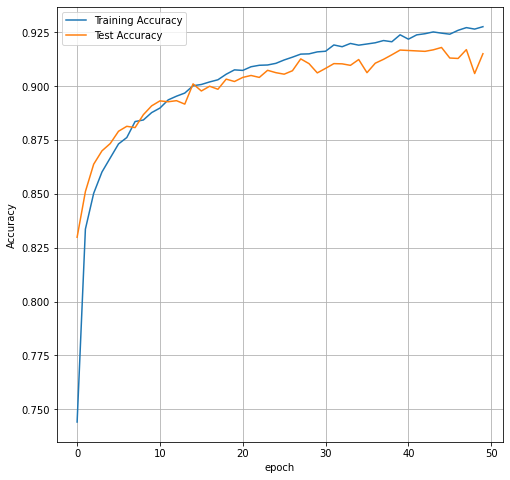

In [21]:
plotter.figure(figsize=(8,8))
plotter.plot(trainingResults.history['accuracy'], label='Training Accuracy')
plotter.plot(trainingResults.history['val_accuracy'], label='Test Accuracy')
plotter.xlabel('epoch')
plotter.ylabel('Accuracy')
plotter.legend()
plotter.grid()
plotter.show()

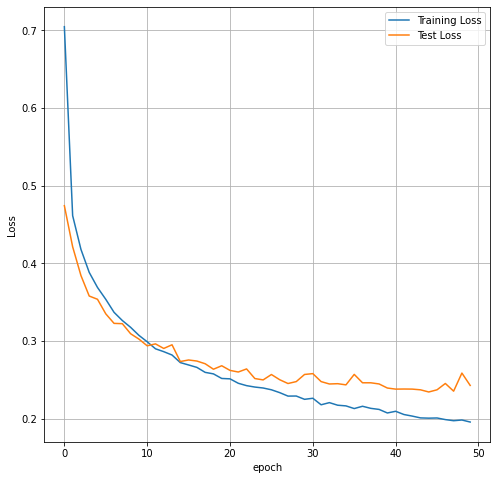

In [22]:
plotter.figure(figsize=(8,8))
plotter.plot(trainingResults.history['loss'], label='Training Loss')
plotter.plot(trainingResults.history['val_loss'], label='Test Loss')
plotter.xlabel('epoch')
plotter.ylabel('Loss')
plotter.legend()
plotter.grid()
plotter.show()